# $k$-means Clustering

In [1]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
import os
import sys
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import Alison's code for the demo clusters
from src.demo_images import function_name_1, function_name_2

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('ggplot')
cmap = 'tab10'

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Learning Goals

SWBAT:

- Assess what scenarios could use $k$-means
- Articulate the methodology used by $k$-means
- Apply KMeans from sklearn.cluster to a relevant dataset
- Select the appropriate number of clusters using the elbow method and Silhouette Scores
- Evaluate the weaknesses and remedies to $k$-means

## Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for k-means can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](../img/initialscenario.png)


## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

#### Method 1

![left](../img/from-left.gif)

#### Method 2

![right](../img/from-right.gif)

#### Method 3

![top](../img/from-top.gif)

#### Method 4

![bottom](../img/from-bottom.gif)

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

In common:
- Green dots starts at points
- Calculates distance
- Moves dots
- Re-measures distance
- Moves dots as needed


Differences:
- Dots start in different places and groups settle in different places

Groups:
- There are four groups

Problem with this method?
- Too variable!

### K-means algorithm, at its core, in an optimization function

![minmax](../img/minmaxdata.png)

### Reassigns groups and adjusts centroids to...
![min](../img/min.png)

### And to...
![max](../img/max.png)

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

## $k$-Means Plotter

In [3]:
from src.k_means_plotter import k_means
from sklearn.datasets import make_blobs

In [4]:
X, Y = make_blobs(centers=3)

In [5]:
X[:5, :]

array([[3.399613  , 1.42127829],
       [7.18469882, 4.19979783],
       [1.9656588 , 2.29926784],
       [2.86475329, 4.17929842],
       [1.94216119, 3.4655475 ]])

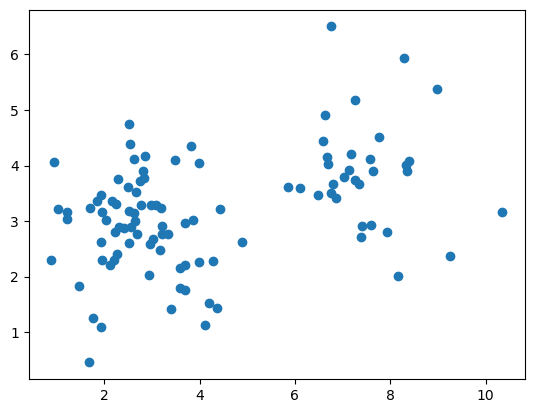

In [6]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1]);

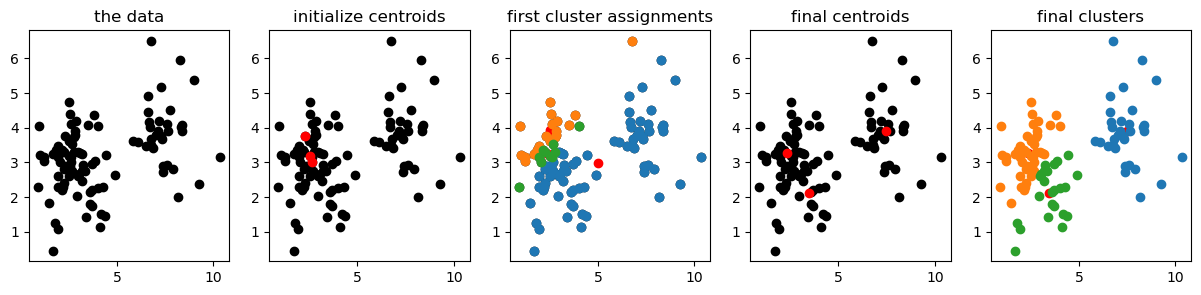

In [7]:
np.random.seed(1)
df = k_means(X[:, 0], X[:, 1], k=3)

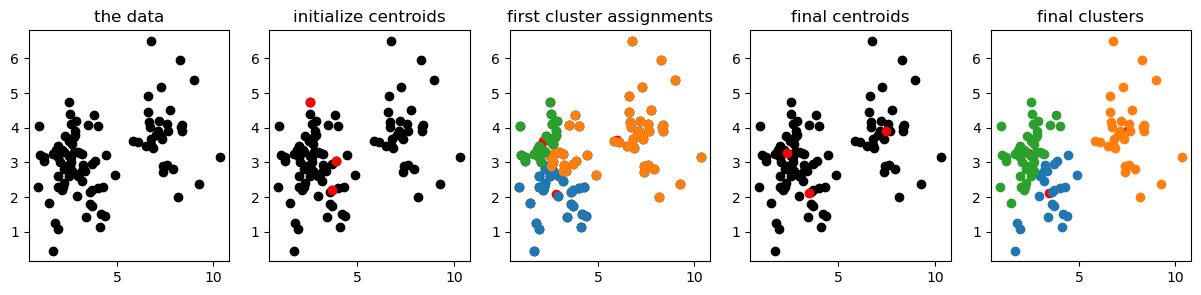

In [9]:
np.random.seed(42)
df = k_means(X[:, 0], X[:, 1], k=3)

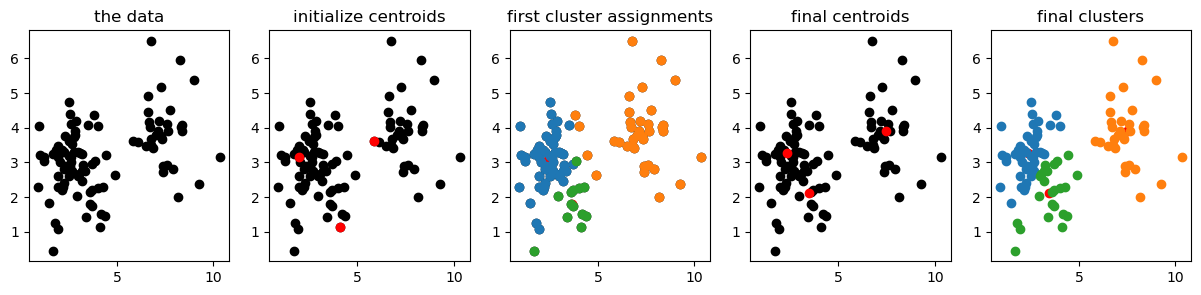

In [10]:
np.random.seed(2)
df = k_means(X[:, 0], X[:, 1], k=3)

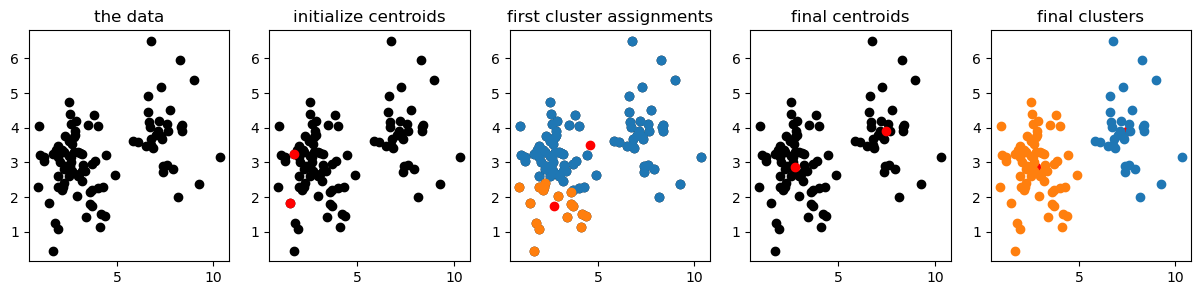

In [11]:
np.random.seed(1)
df = k_means(X[:, 0], X[:, 1], k=2)

#### Data for the exercise

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [12]:
dummy_dat = pd.read_csv("../data/xclara.txt",
                        header=0,
                        index_col=0)
dummy_dat.reset_index(inplace=True)
dummy_dat.drop('index', axis=1, inplace=True)

In [13]:
dummy_dat.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [14]:
dummy_dat.tail()

,V1,V2
2995,85.65280,-6.461061
2996,82.77088,-2.373299
2997,64.46532,-10.501360
2998,90.72282,-12.255840
2999,64.87976,-24.877310


#### EDA of variables

In [15]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


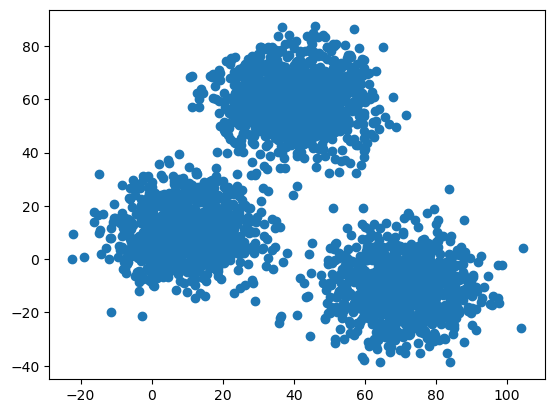

In [16]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2']);

#### Introduction of `Kmeans`

In [17]:
model = KMeans(n_clusters=3).fit(dummy_dat)

Notice the `init` and `n_init` parameters!

In [18]:
model.cluster_centers_

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

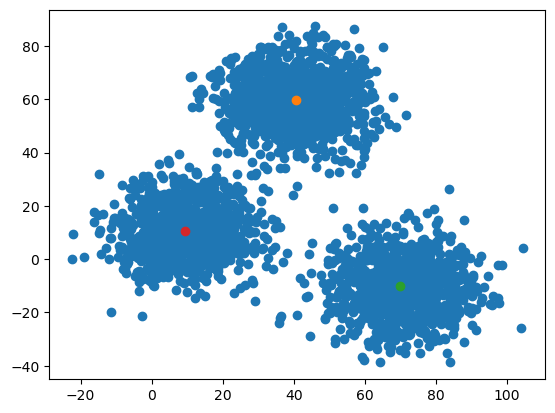

In [19]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'])
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0],
                model.cluster_centers_[i][1]);

In [20]:
model.predict([[60, -20]])

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

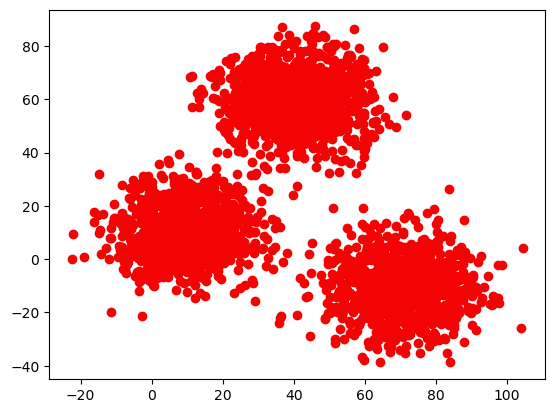

In [21]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c='#f30303');

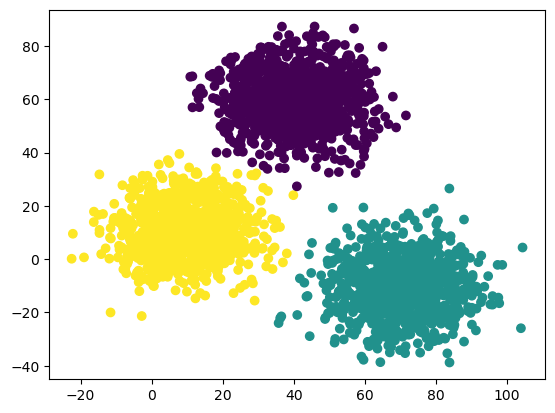

In [22]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c=model.labels_);

In [23]:
labeled_df = pd.concat([dummy_dat, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [24]:
labeled_df.head()

,V1,V2,cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2


In [25]:
cluster0 = labeled_df[labeled_df['cluster'] == 0]
cluster1 = labeled_df[labeled_df['cluster'] == 1]
cluster2 = labeled_df[labeled_df['cluster'] == 2]

In [26]:
cluster0['V1'].head()

29     24.29990
326    37.48364
900    48.19050
901    48.32863
902    31.44145
Name: V1, dtype: float64

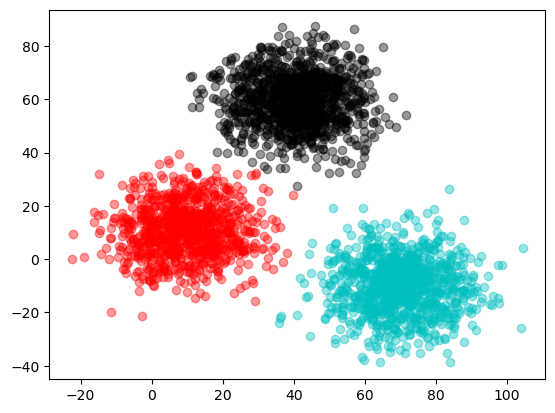

In [27]:
fig, ax = plt.subplots()
ax.scatter(cluster0['V1'], cluster0['V2'], c='k', alpha=0.4)
ax.scatter(cluster1['V1'], cluster1['V2'], c='c', alpha=0.4)
ax.scatter(cluster2['V1'], cluster2['V2'], c='r', alpha=0.4);

## Note
#### You *may* have different cluster centers.

We saw in the demo that the algorithm is sensitive to starting points.

Even if we set `n_init` to a significant value, it's still a good idea to use `random_state` to ensure repeatable results.

In [28]:
model_setseed = KMeans(n_clusters=3, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

#### **Exercise**: 
- Try running `Kmeans` with different numbers of `n_clusters`, $k=2$ through $k=4$
- Check the `cluster_centers_`.

In [29]:

#Practice code goes here
#1. Load the iris dataset from sklearn
iris = datasets.load_iris()
iris_data = iris.data
iris_data[:5]

#2. Initialize and fit KMeans model with 3 clusters
model_iris = KMeans(n_clusters=5).fit(iris_data)


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


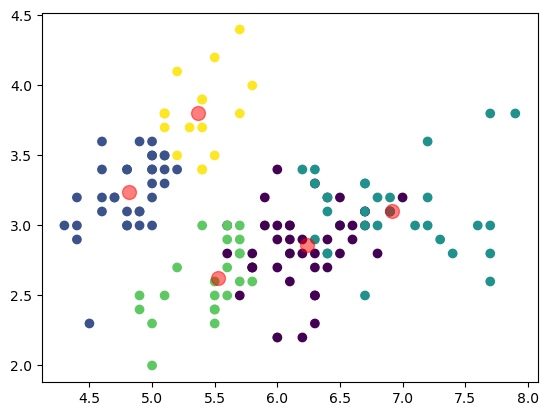

In [30]:
#3. Get the cluster centers
model_iris.cluster_centers_
#4. Get the cluster labels
model_iris.labels_
#5. Plot the clusters
fig, ax = plt.subplots()
ax.scatter(iris_data[:, 0], iris_data[:, 1],
           c=model_iris.labels_);
ax.scatter(model_iris.cluster_centers_[:, 0],
            model_iris.cluster_centers_[:, 1],
            c='r', s=100, alpha=0.5);

## **Part 2**: Choosing the appropriate number of $k$

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of $k$ to find the best value of $k$.

This is sometimes called the "inertia" of the model, and fitted sklearn $k$-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

Fewer clusters seems better, but inertia will always decrease with _more_ clusters. Hence the idea of looking for an elbow in the plot of inertia vs. $k$.

In [31]:
model.inertia_

611605.8806933891

Inertia is the sum of squared distances between points and their cluster center.

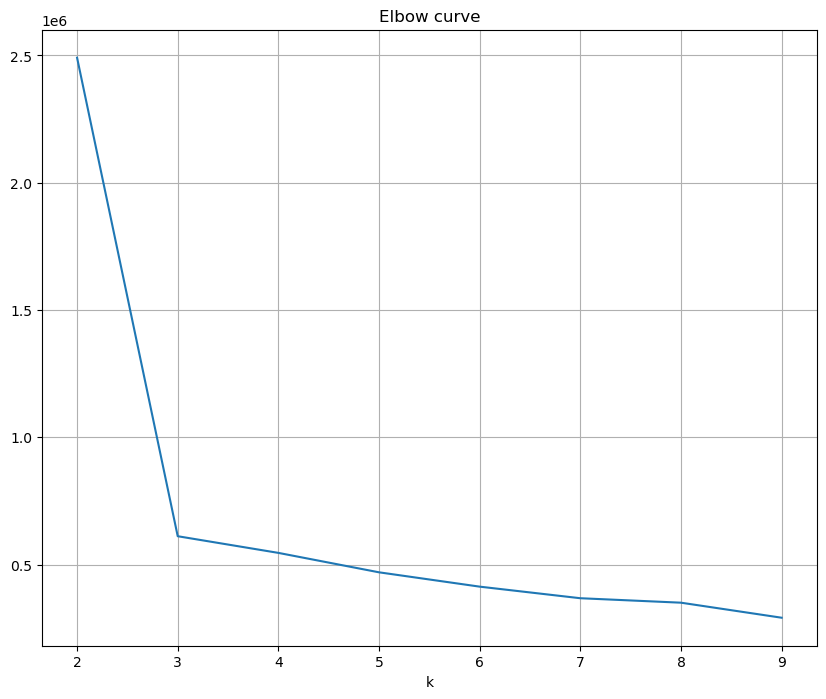

In [32]:
# Specifying the dataset and initializing variables
X = dummy_dat
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)

### **Part 2B**: Silhouette Coefficient

![silo](../img/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

The Silhouette Coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





Suppose:
- I have four points in a one-dimensional space: 0, 1, 9, and 10; and
- I put them into two clusters: {0, 1} and {9, 10}.

Then we would calculate the Silhouette Score as follows:

For Point 0:
- $a=1$
- $b=9.5$
- $s(0) = \frac{9.5 - 1}{9.5} = \frac{17}{19}$

For Point 1:
- $a=1$
- $b=8.5$
- $s(1) = \frac{8.5 - 1}{8.5} = \frac{15}{17}$

For Point 9:
- $a=1$
- $b=8.5$
- $s(9) = \frac{8.5 - 1}{8.5} = \frac{15}{17}$

For Point 10:
- $a=1$
- $b=9.5$
- $s(10) = \frac{9.5 - 1}{9.5} = \frac{17}{19}$

The full Silhouette Score would be the average of all of these individual scores:

$\large s = \frac{2\left(\frac{17}{19}\right) + 2\left(\frac{15}{17}\right)}{4}$

In [33]:
(2 * 17/19 + 2 * 15/17) / 4

0.8885448916408669

In [34]:
metrics.silhouette_score(np.array([0, 1, 9, 10]).reshape(-1, 1), ['red', 'red', 'blue', 'blue'])

0.8885448916408669

In [35]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

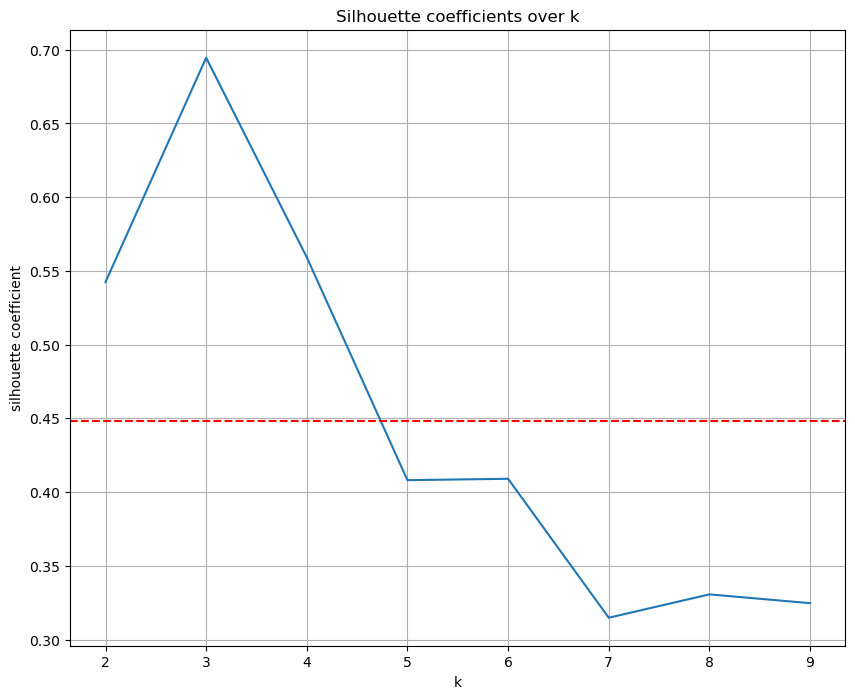

In [36]:
# Plot Silhouette coefficient
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Silhouette coefficients over k')
ax.set_xlabel('k')
ax.set_ylabel('silhouette coefficient')
ax.plot(range(2, 10), silhouette_plot)
ax.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
ax.grid(True)

## **Part 3**: **Assumptions** and **challenges** of $k$-means

- Demonstrate the ideal $k$-means dataset
- Show three scenarios where $k$-means struggles

#### Ideal $k$-means scenario

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


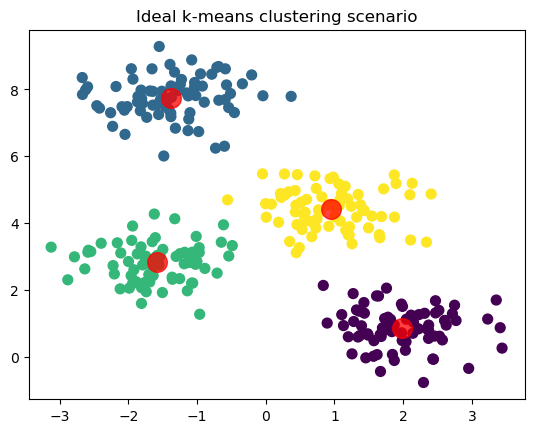

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def ideal():
    # Generate synthetic data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    # Plot the clusters
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title("Ideal k-means clustering scenario")
    plt.show()

# Call the ideal function
ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

In [41]:
messyOne()

NameError: name 'messyOne' is not defined

#### Problem Scenario 2 - imbalanced class size

In [ ]:
messyTwo()

#### Problem Scenario 3 - class size and density

In [ ]:
messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

## Exercise:
### $k$-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [38]:
# Work on problem here: Would scaling make a difference?
wine = pd.read_csv('../data/Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Review $k$-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of $k$
4. Plot SSE and Silhouette coefficient to find best $k$
5. Describe the characteristics of each cluster using their centroids

### How many clusters fit the data?

What can you tell me about them?

According to the Elbow Method, our best choice here is **3 clusters**.

## One last example

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.

### 1. Look at and Clean Data (if needed)
Before applying $k$-means clustering, it's essential to inspect and clean the data. This involves loading the dataset, checking for missing values, removing unnecessary columns, and ensuring that the data is in a suitable format for clustering.

In [40]:
# Check for missing values
print(wine.isnull().sum())

# Display basic statistics of the dataset
print(wine.describe())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       To

In [41]:
# Check for duplicate rows
duplicates = wine.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
# wine = wine_data.drop_duplicates()

Number of duplicate rows: 0


### *2. Ensure Feature Scaling* 
$k$-means clustering is sensitive to the scale of the features. Ensuring that all features are on a similar scale.

In [42]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine)

# Convert scaled data back to DataFrame for easier handling
scaled_wine = pd.DataFrame(scaled_wine, columns=wine.columns)
scaled_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## *3. Try Various Values of $k$*
To determine the optimal number of clusters ($k$) for $k$-means clustering, we can try different values of $k$ and evaluate the results using methods like the Elbow method and the Silhouette score.

### Step-by-Step Implementation
Elbow Method: The Elbow method helps to determine the optimal number of clusters by plotting the sum of squared distances (inertia) against the number of clusters.

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

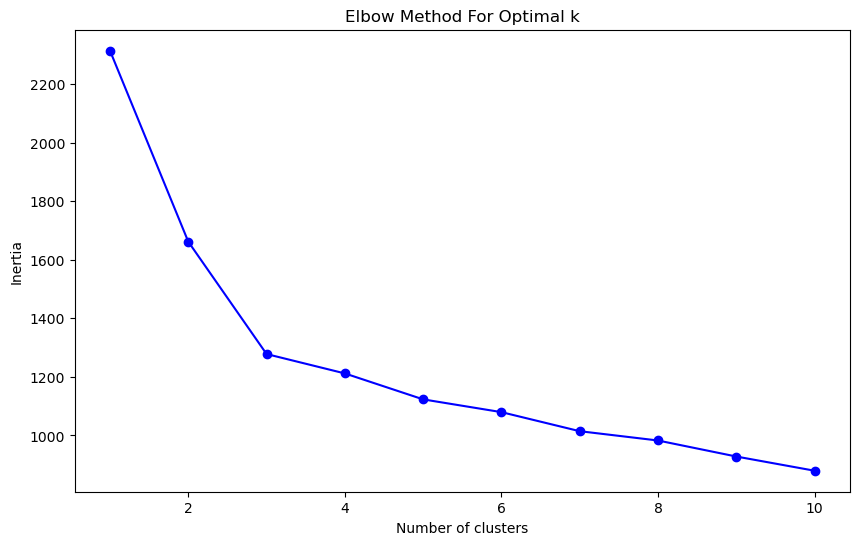

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_wine)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## Silhouette Score: 
The Silhouette score measures how similar a sample is to its own cluster compared to other clusters. A higher Silhouette score indicates better-defined clusters.

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

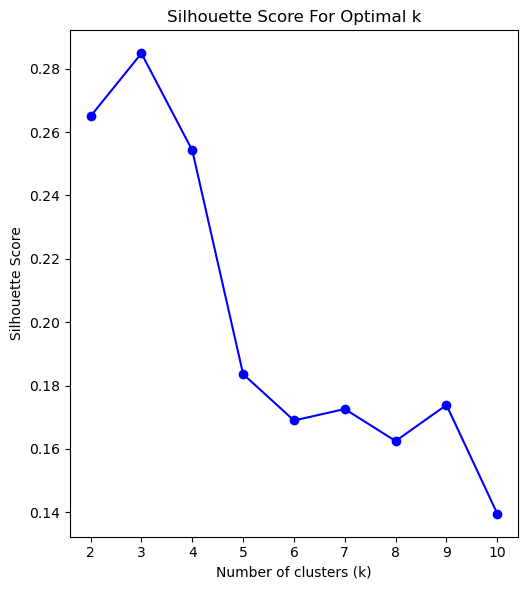

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store SSE and Silhouette scores
sse = []
silhouette_scores = []

# Range of k values to try
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_wine)
    sse.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_wine, labels))

# # Plot SSE (Elbow Method)
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.plot(K, sse, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Sum of Squared Errors (SSE)')
# plt.title('Elbow Method For Optimal k')

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()

# Interpretation

### 1. Cluster 0:
Characteristics: This cluster has specific mean values for each feature, indicating a particular profile of wines.
Size: Contains 50 data points, suggesting it represents a moderate portion of the dataset.

### 2. Cluster 1:
Characteristics: This cluster has different mean values for each feature, indicating another distinct profile of wines.
Size: Contains 75 data points, making it the largest cluster, suggesting it represents a significant portion of the dataset.

### 3. Cluster 2:
Characteristics: This cluster has yet another set of mean values for each feature, indicating a third distinct profile of wines.
Size: Contains 25 data points, making it the smallest cluster, suggesting it represents a smaller portion of the dataset.

### Potential Problems in the Data
#### i. Imbalanced Clusters: 
If one cluster has significantly more samples than others, it might indicate an imbalance in the data.
#### ii. Outliers: 
Outliers can affect the clustering results. It's essential to check for and handle outliers appropriately.
#### iii. Feature Scaling: 
Ensure that all features are on a similar scale, as $k$-means is sensitive to feature scaling.

By examining the cluster centers and the distribution of data points, you can gain insights into the characteristics of each cluster and how they differ from each other. This information can help in making recommendations and understanding the underlying structure of the data.

## *4. Choose the Optimal Number of Clusters:*
Based on the plots, choose the optimal number of clusters. The "elbow" point in the SSE plot and the peak in the Silhouette score plot indicate the best $k$.

## Step-by-Step Implementation
1. Load and Inspect the Data
First, download the dataset from the UCI database and load it into a pandas DataFrame.

In [39]:
shopping = pd.read_excel('../data/Online Retail.xlsx')

In [45]:
shopping.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


To analyze the online retail data and identify patterns that can help increase sales, we can follow these steps:

1. Load and Inspect the Data.
2. Clean the Data.
3. Create New Variables.
4. Perform $k$-means Clustering.
5. Analyze the Clusters.

## 2. Clean the Data
Clean the data by handling missing values, removing duplicates, and filtering out invalid entries.

In [46]:
# Check for missing values
print(shopping.isnull().sum())

# Display basic statistics of the dataset
print(shopping.describe())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.00000

In [47]:
# Check for duplicate rows
duplicates = shopping.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
# wine = wine_data.drop_duplicates()

Number of duplicate rows: 5268


In [48]:
# Drop rows with missing values
shopping.dropna(inplace=True)

# Remove duplicates
shopping.drop_duplicates(inplace=True)

# Filter out invalid entries (e.g., negative quantities or prices)
retail_data = shopping[(shopping['Quantity'] > 0) & (shopping['UnitPrice'] > 0)]

# Display the cleaned data
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### *3. Create New Variables*
Create new variables that can help in clustering, such as total spending per invoice, recency, frequency, and monetary value (RFM analysis).

In [49]:
# Create a new variable for total spending per invoice
retail_data['TotalSpent'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Perform RFM analysis
import datetime as dt

# Define the reference date for recency calculation
reference_date = dt.datetime(2011, 12, 10)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpent': 'sum'
}).reset_index()

# Rename the columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the RFM data
rfm.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2572\2625390535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['TotalSpent'] = retail_data['Quantity'] * retail_data['UnitPrice']


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


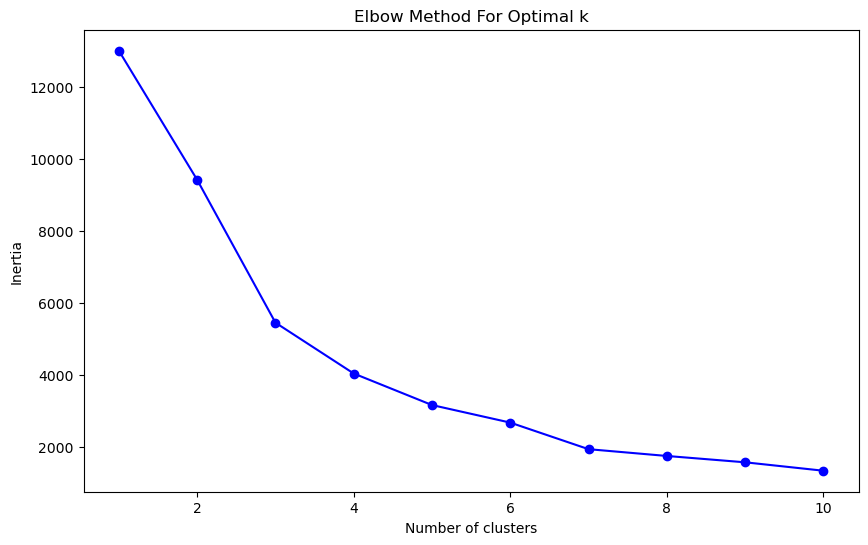

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM data
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_rfm)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# Based on the Elbow method, choose the optimal number of clusters (e.g., k=4)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

# Display the first few rows of the RFM data with cluster labels
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,1
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,0
3,12349.0,18,73,1757.55,0
4,12350.0,310,17,334.40,1


### *5. Analyze the Clusters*
Examine the characteristics of each cluster to understand the customer segments.

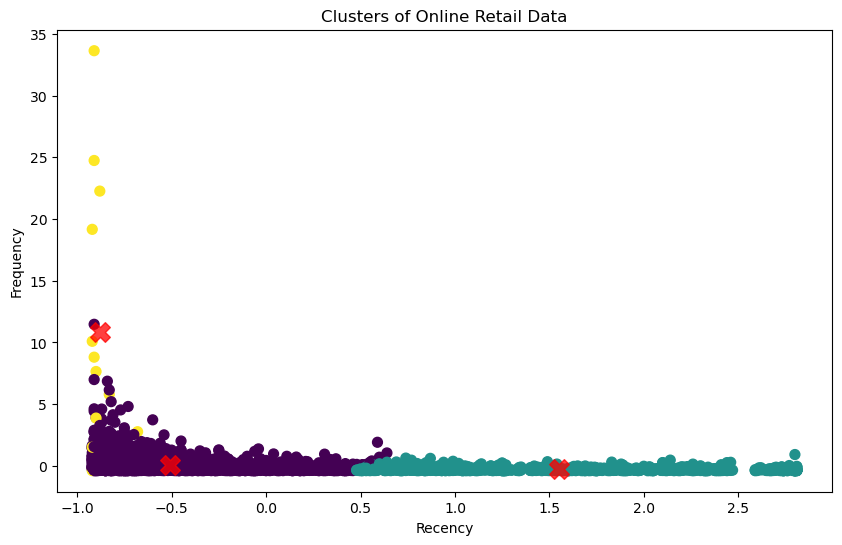

In [52]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to a DataFrame for easier interpretation
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=['Recency', 'Frequency', 'Monetary'])

# Add cluster labels to the DataFrame
cluster_centers_df['Cluster'] = range(optimal_k)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_rfm[:, 0], scaled_rfm[:, 1], c=rfm['Cluster'], cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters of Online Retail Data')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Display the cluster centers
print(cluster_centers_df)

# Analyze the distribution of data points in each cluster
cluster_counts = rfm['Cluster'].value_counts()
cluster_counts

      Recency    Frequency       Monetary  Cluster
0   41.060923   101.629538    2020.421841        0
1  247.306047    27.375814     635.423713        1
2    4.000000  2535.923077  125981.340000        2


Cluster
0    3246
1    1079
2      13
Name: count, dtype: int64

### Interpretation of Clusters

Based on the provided cluster centers and the distribution of customers in each cluster, we can draw insights about the characteristics of each cluster and potential strategies to increase sales.

#### Cluster Centers

| Recency    | Frequency  | Monetary       | Cluster |
|------------|------------|----------------|---------|
| 41.06      | 101.63     | 2020.42        | 0       |
| 247.31     | 27.38      | 635.42         | 1       |
| 4.00       | 2535.92    | 125981.34      | 2       |

#### Cluster Sizes

| Cluster | Count |
|---------|-------|
| 0       | 3246  |
| 1       | 1079  |
| 2       | 13    |

### Detailed Analysis

1. *Cluster 0*:
   - *Characteristics*: 
     - Moderate recency (41.06 days since last purchase).
     - Moderate frequency (101.63 purchases).
     - Moderate monetary value (2020.42).
   - *Size*: Largest cluster with 3246 customers.
   - *Strategy*: These customers are moderately engaged. Consider loyalty programs or personalized offers to increase their purchase frequency and spending. Regular communication and targeted promotions can help maintain their engagement.

2. *Cluster 1*:
   - *Characteristics*: 
     - High recency (247.31 days since last purchase).
     - Low frequency (27.38 purchases).
     - Low monetary value (635.42).
   - *Size*: Second largest cluster with 1079 customers.
   - *Strategy*: These customers are less engaged. Implement re-engagement campaigns, such as email reminders, discounts, or special promotions to bring them back. Consider surveying these customers to understand their needs and preferences better.

3. *Cluster 2*:
   - *Characteristics*: 
     - Very low recency (4.00 days since last purchase).
     - Very high frequency (2535.92 purchases).
     - Very high monetary value (125981.34).
   - *Size*: Small cluster with 13 customers.
   - *Strategy*: These are your best customers. Focus on retaining them with VIP programs, exclusive offers, and personalized services to maintain their loyalty. Provide exceptional customer service and consider involving them in loyalty programs or early access to new products.

### Visualization

Visualizing the clusters can help in understanding their separation and distribution.

### Summary

- *Cluster 0*: Largest group with moderate engagement. Focus on loyalty programs and regular communication.
- *Cluster 1*: Less engaged customers. Implement re-engagement campaigns and understand their needs.
- *Cluster 2*: Highly engaged and valuable customers. Retain with VIP programs and personalized experiences.

By understanding the characteristics of each cluster, you can tailor your marketing strategies to target specific customer segments, encouraging them to buy more frequently and increase their spending.